In [1]:
import numpy as np 
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
#importing the visualisation libraries

df = pd.read_csv("Student_performance_data .csv")
#Loading the data

df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [2]:
df.info()
#Here we see that there are no null values that we need to eliminate and that most of the variables are floating point or numbers of some sort

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
StudentID,2392.0,2196.500000,690.655244,1001.000000,1598.750000,2196.500000,2794.250000,3392.000000
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000


In [4]:
df_duplicates = df[df.duplicated()]
print(df_duplicates)
#The are no duplicates that could skew the data

Empty DataFrame
Columns: [StudentID, Age, Gender, Ethnicity, ParentalEducation, StudyTimeWeekly, Absences, Tutoring, ParentalSupport, Extracurricular, Sports, Music, Volunteering, GPA, GradeClass]
Index: []


In [5]:
output_Var = "GradeClass"
all_features = df.columns.drop([output_Var, "GPA", "StudentID"]).tolist()
categorical_features = df.columns.drop([output_Var, "GPA", "StudentID", "StudyTimeWeekly", "Absences"]).tolist()
quantitative_features = df.columns.drop([])
#splitting the output variable from our features and dropping the unique identifier

print(categorical_features)

['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']


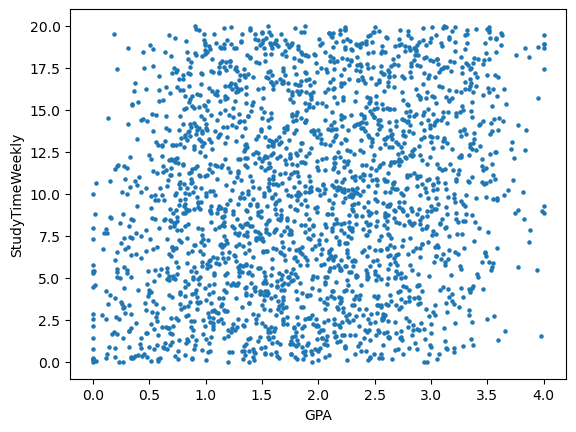

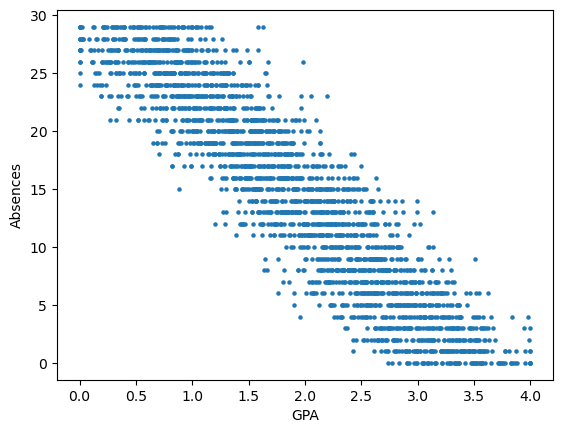

In [6]:
ScatterPlot = df.plot.scatter(x= "GPA", y = "StudyTimeWeekly", s = 5)
ScatterPlot2 = df.plot.scatter(x= "GPA", y = "Absences", s = 5)

#There doesn't seem to be a strong relationship between study time and GPA but there does seem to be a moderate negetive linear trend that connects total Absences to GPA

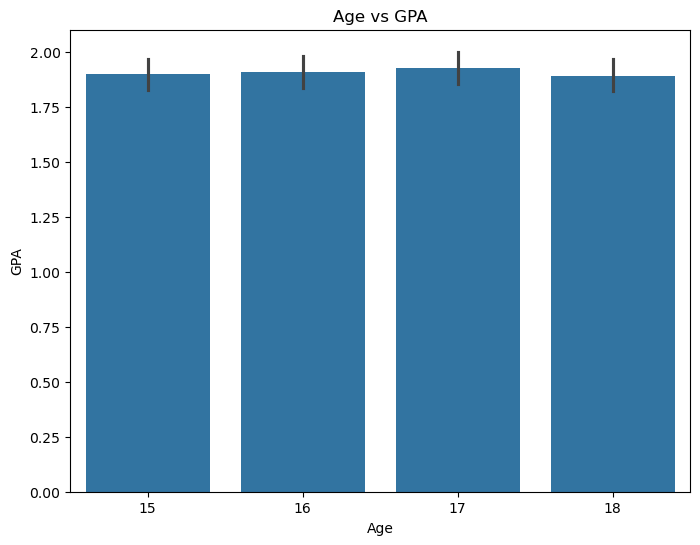

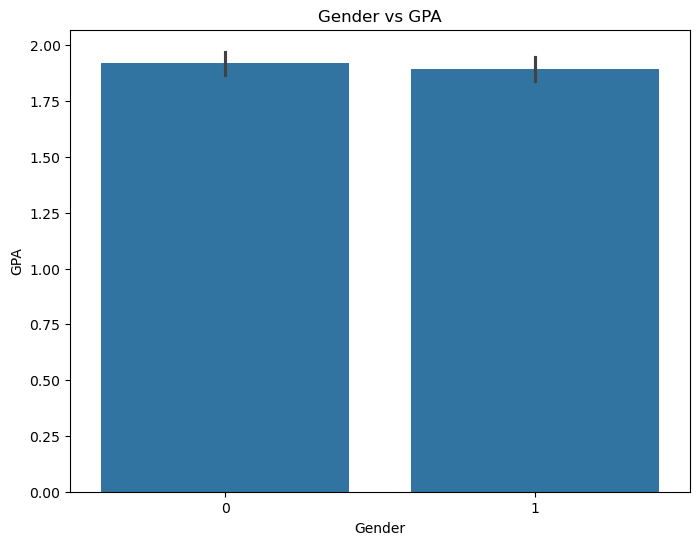

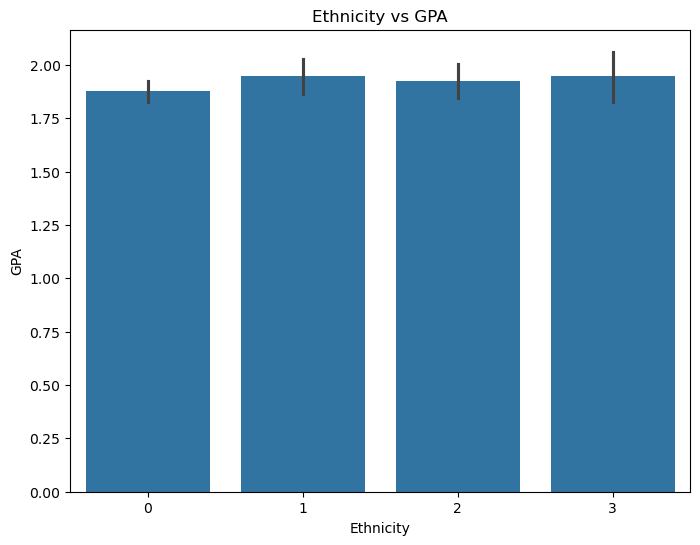

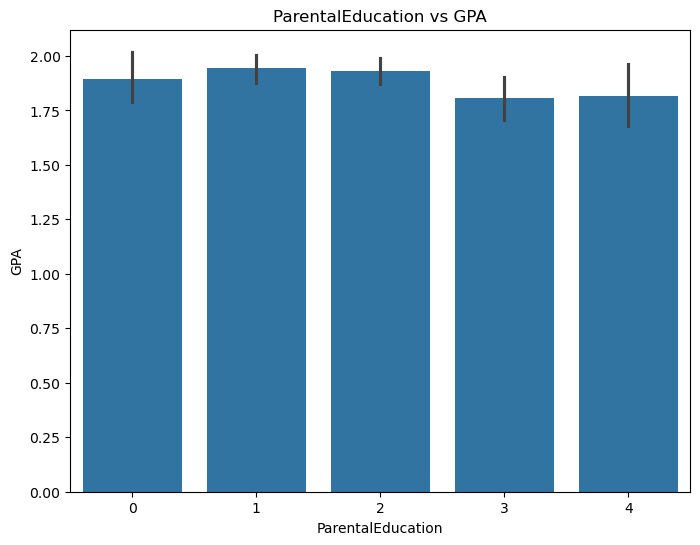

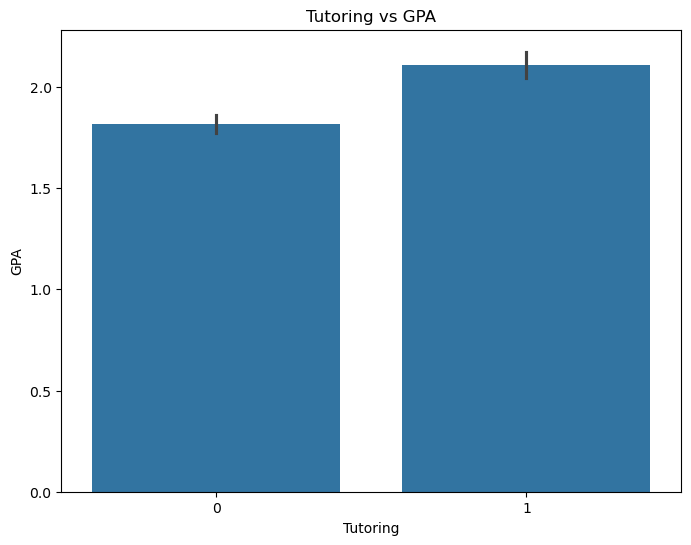

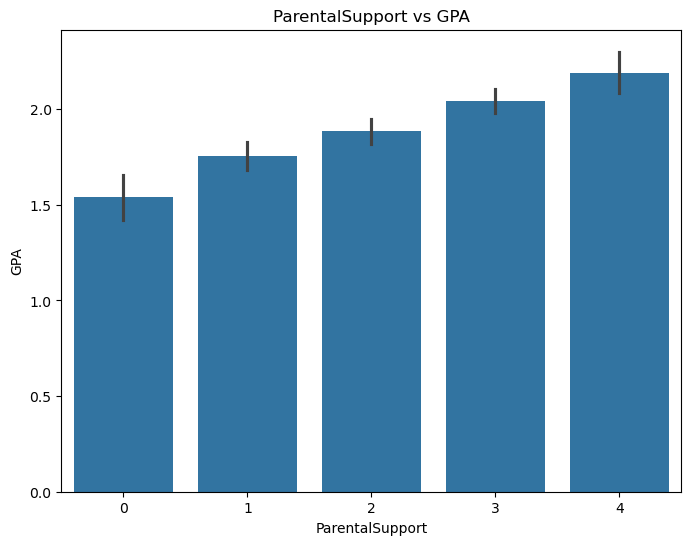

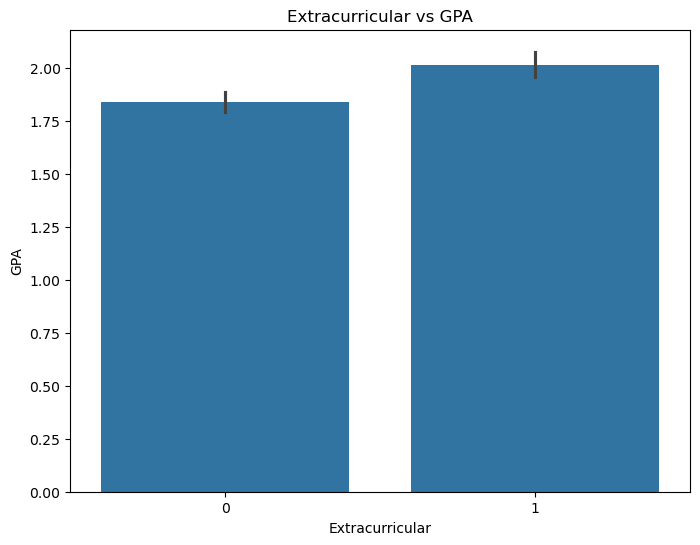

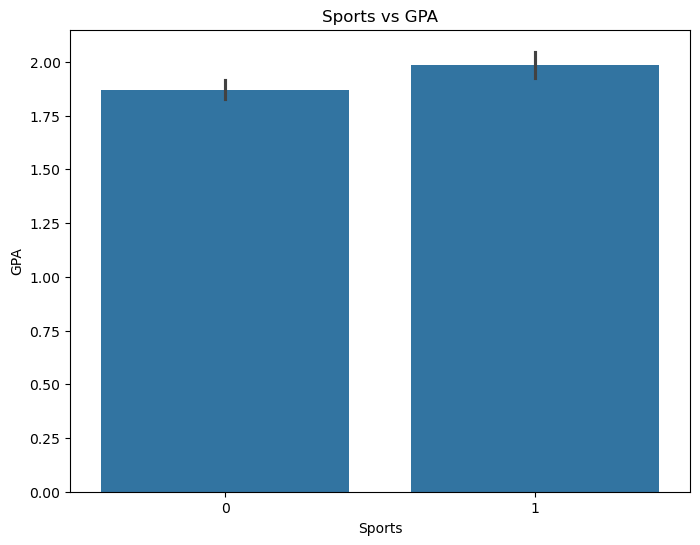

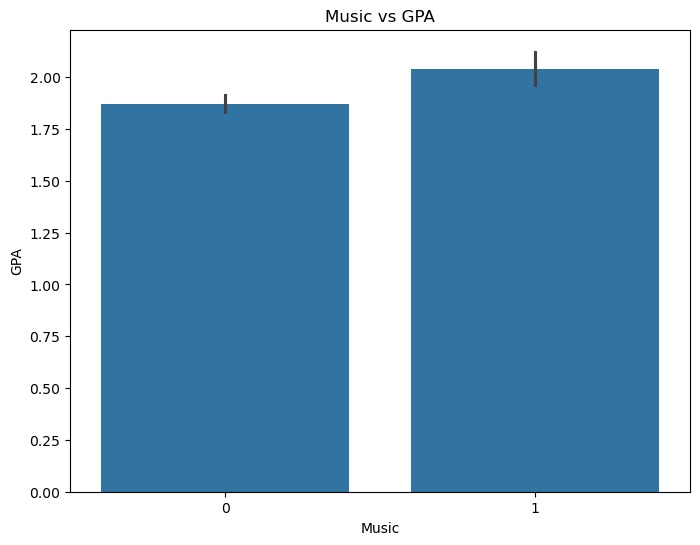

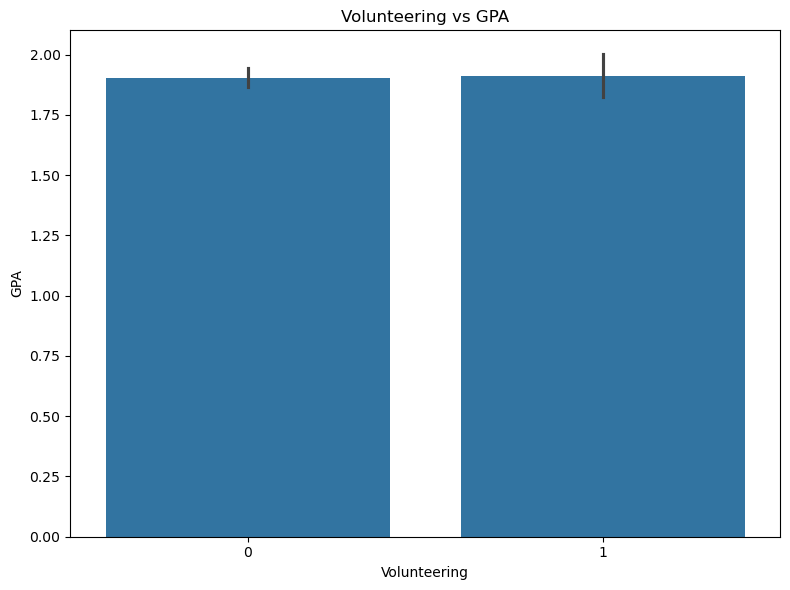

In [7]:
for i in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=i, y="GPA", data=df)
    plt.title(f"{i} vs GPA")
plt.tight_layout()
plt.show()
#Age, Gender, Volunteering, and Ethnicity do not seem to have a  significant impact on Grade Class. 
#On average, students with parents who finished a Bachelor's and engaged in Higher Study do worse in school. Though the effect of Parental Education is low. Increased Parental Education might lead to decreased Parental Support which harms student performance
#Engaging in extracurricular acivities, music, and sports have a small positive impact on student performance. 
#Tutoring seems to have a moderate positive impact on student performance. 
#Parental support has a high impact on student performance. 

<Axes: xlabel='ParentalEducation', ylabel='ParentalSupport'>

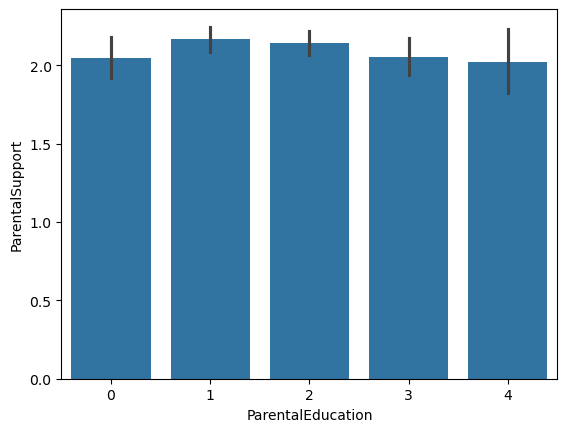

In [8]:
sns.barplot(x='ParentalEducation', y='ParentalSupport', data=df)
#Parental education and support don't seem to be correlated. 

<Axes: xlabel='Absences', ylabel='GPA'>

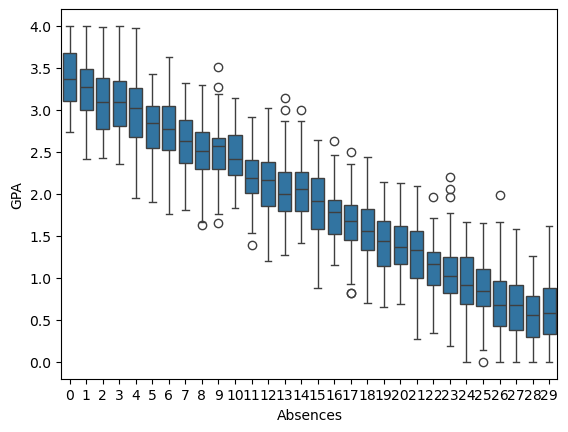

In [16]:
sns.boxplot(x='Absences', y='GPA', data=df)